In [31]:
from pathlib import Path  
import os               

def use_jupyter_folder():
    jupyter_folder = Path.home() / 'Documents' / 'Beats and beliefs'
    
    if jupyter_folder.exists():
        os.chdir(jupyter_folder)
        print(f"✅ Now using your Jupyter folder!")
        print(f"Current working directory: {Path.cwd()}")
    else:
        print("❌ Couldn't find the Jupyter folder in Documents.")
        print("Please make sure you've created it first.")

use_jupyter_folder()

✅ Now using your Jupyter folder!
Current working directory: /Users/mei_knight/Documents/Beats and beliefs


In [33]:
FILENAME = "merged_data.csv"

import pandas as pd

def load_csv(filename):
   """Load CSV file and display info"""
   try:
       df = pd.read_csv(filename)
       print(f"✅ Successfully loaded {filename}")
       print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
       print("\nColumns in this dataset:")
       for col in df.columns:
           print(f"- {col}")
       return df
   except FileNotFoundError:
       print(f"❌ Could not find {filename} in {Path.cwd()}")
   except Exception as e:
       print(f"❌ Error loading file: {str(e)}")

df = load_csv(FILENAME)

✅ Successfully loaded merged_data.csv
Shape: 3050 rows, 9 columns

Columns in this dataset:
- Country
- Continent
- Rank
- Title
- Artists
- Album
- Explicit
- Duration
- Democracy_Index


In [35]:
import pandas as pd
!pip install lyricsgenius

In [61]:
key = "dPal6cVvDHpzUr8SB6MTjYd8mGUqB5FVUi9feF8J45GBh-rcUDeanI1mLMrtb8Ay"

In [63]:
import lyricsgenius
import time

genius = lyricsgenius.Genius(key, timeout=10, skip_non_songs=True, remove_section_headers=True)

def get_lyrics(title, artist):
    try:
        song = genius.search_song(title, artist)
        return song.lyrics if song else None
    except Exception as e:
        print(f"Error for {title} - {artist}: {e}")
        return None

# Apply function to first few rows (test first!)
df['Lyrics'] = df.apply(lambda x: get_lyrics(x['Title'], x['Artists']), axis=1)

# Optional: save progress as you go
df.to_csv("songs_with_lyrics_partial.csv", index=False)

Searching for "Colocao" by Nicki Nicole...
Done.
Searching for "Favorito" by Camilo...
Done.
Searching for "PORFA" by Feid, Justin Quiles...
Done.
Searching for "Yo Perreo Sola" by Bad Bunny...
Done.
Searching for "C.R.O: Bzrp Music Session, Vol. 29" by Bizarrap, C.R.O...


KeyboardInterrupt: 

In [65]:
import lyricsgenius
import pandas as pd
import time

# --- Setup Genius ---
genius = lyricsgenius.Genius(
    key,
    timeout=10,
    skip_non_songs=True,
    remove_section_headers=True
)

# --- Keep track of seen songs ---
seen = set()

def get_lyrics(title, artist):
    """Fetch lyrics once per unique (title, artist) pair."""
    combo = (str(title).lower().strip(), str(artist).lower().strip())

    # Skip duplicates
    if combo in seen:
        print(f"⏭️ Skipping duplicate: {title} - {artist}")
        return None

    seen.add(combo)

    try:
        print(f'Searching for "{title}" by {artist}...')
        song = genius.search_song(title, artist)
        time.sleep(1)  # small delay for safety
        return song.lyrics if song else None
    except Exception as e:
        print(f"Error for {title} - {artist}: {e}")
        return None

# --- Only process songs without lyrics ---
if "Lyrics" not in df.columns:
    df["Lyrics"] = None

df.loc[df["Lyrics"].isna(), "Lyrics"] = df.loc[df["Lyrics"].isna()].apply(
    lambda x: get_lyrics(x["Title"], x["Artists"]), axis=1
)

# --- Save output ---
df.to_csv("songs_with_lyrics_partial.csv", index=False)
print("✅ Done! Saved to songs_with_lyrics_partial.csv.")

Searching for "Colocao" by Nicki Nicole...
Searching for "Colocao" by Nicki Nicole...
Done.
Searching for "Favorito" by Camilo...
Searching for "Favorito" by Camilo...
Done.
Searching for "PORFA" by Feid, Justin Quiles...
Searching for "PORFA" by Feid, Justin Quiles...
Done.
Searching for "Yo Perreo Sola" by Bad Bunny...
Searching for "Yo Perreo Sola" by Bad Bunny...
Done.
Searching for "C.R.O: Bzrp Music Session, Vol. 29" by Bizarrap, C.R.O...
Searching for "C.R.O: Bzrp Music Session, Vol. 29" by Bizarrap, C.R.O...
Done.
Searching for "Elegí (feat. Dímelo Flow)" by Rauw Alejandro, Dalex, Lenny Tavárez, Dímelo Flow...
Searching for "Elegí (feat. Dímelo Flow)" by Rauw Alejandro, Dalex, Lenny Tavárez, Dímelo Flow...
Done.
Searching for "Rojo" by J Balvin...
Searching for "Rojo" by J Balvin...
Done.
Searching for "Safaera" by Bad Bunny, Jowell & Randy, Nengo Flow...
Searching for "Safaera" by Bad Bunny, Jowell & Randy, Nengo Flow...
Done.
Searching for "Tattoo" by Rauw Alejandro...
Search

In [67]:
import re
import pandas as pd

INPUT_FILE = "All Songs.txt"       
OUTPUT_FILE = "failed_songs.csv"

pattern = re.compile(r"No results found for: '(.+)'")

failed = []

with open(INPUT_FILE, "r", encoding="utf-8") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            text = match.group(1).strip()

            if " by " in text:
                title, artists = text.split(" by ", 1)
            else:
                if ")" in text:
                    parts = text.rsplit(") ", 1)
                    if len(parts) == 2:
                        title = parts[0] + ")"
                        artists = parts[1]
                    else:
                        title, artists = text, None
                else:
                    if "," in text:
                        parts = text.rsplit(" ", 1)
                        title = parts[0]
                        artists = parts[1] if len(parts) > 1 else None
                    else:
                        title, artists = text, None

            failed.append({
                "Full_Text": text,
                "Title": title.strip() if title else None,
                "Artists": artists.strip() if artists else None
            })

if failed:
    pd.DataFrame(failed).to_csv(OUTPUT_FILE, index=False)

In [69]:
import pandas as pd

INPUT_FILE = "songs_with_lyrics_partial.csv"
OUTPUT_FILE = "songs_with_lyrics_filled.csv"

df = pd.read_csv(INPUT_FILE)

df["Title_clean"] = df["Title"].str.strip().str.lower()
df["Artists_clean"] = df["Artists"].str.strip().str.lower()

lyrics_map = (
    df.dropna(subset=["Lyrics"])
      .drop_duplicates(subset=["Title_clean", "Artists_clean"])
      .set_index(["Title_clean", "Artists_clean"])["Lyrics"]
      .to_dict()
)

def fill_lyrics(row):
    if pd.isna(row["Lyrics"]):
        return lyrics_map.get((row["Title_clean"], row["Artists_clean"]), None)
    return row["Lyrics"]

df["Lyrics"] = df.apply(fill_lyrics, axis=1)

df.drop(columns=["Title_clean", "Artists_clean"], inplace=True)
df.to_csv(OUTPUT_FILE, index=False)

print(f"✅ Done! Filled missing lyrics. Saved to '{OUTPUT_FILE}'")

✅ Done! Filled missing lyrics. Saved to 'songs_with_lyrics_filled.csv'


In [71]:
!pip install google-cloud-translate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 33.4 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.0 which is incompatible.


In [75]:
import pandas as pd
from google.cloud import translate_v3 as translate

In [77]:
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "translate_key.json"

In [85]:
client = translate.TranslationServiceClient()
project_id = "confident-trail-477603-c3"
location = "global"
parent = f"projects/{project_id}/locations/{location}"

try:
    text = "Bonjour le monde"
    response = client.translate_text(
        request={
            "parent": parent,
            "contents": [text],
            "mime_type": "text/plain",
            "target_language_code": "en",
        }
    )
    translated_text = response.translations[0].translated_text
    print("Sample output:", translated_text)

except Exception as e:
    print("Something went wrong:", e)

Sample output: Hello world


In [91]:
def translate_text(text: str, target_language: str = "en") -> str:
    if not text or pd.isna(text):
        return text

    max_chunk = 4500
    chunks = [text[i:i+max_chunk] for i in range(0, len(text), max_chunk)]
    translated_chunks = []

    for chunk in chunks:
        try:
            response = client.translate_text(
                request={
                    "parent": parent,
                    "contents": [chunk],
                    "mime_type": "text/plain",
                    "target_language_code": target_language,
                }
            )
            translated_chunks.append(response.translations[0].translated_text)
            time.sleep(0.2)  # short delay between requests
        except Exception as e:
            print(f"⚠️ Error translating chunk: {e}")
            translated_chunks.append("[TRANSLATION ERROR]")
            time.sleep(2)

    return "\n".join(translated_chunks)

df = pd.read_csv("songs_with_lyrics_filled.csv")

if "Lyrics_EN" not in df.columns:
    df["Lyrics_EN"] = None

for i, row in df.iterrows():
    text = row.get("Lyrics")
    if pd.isna(text) or not isinstance(text, str):
        continue

    print(f"🌍 Translating {i+1}/{len(df)}: {row['Title']} by {row['Artists']}")
    translated_text = translate_text(text)
    df.at[i, "Lyrics_EN"] = translated_text 

    if (i + 1) % 10 == 0:
        df.to_csv("songs_with_lyrics_translated_partial.csv", index=False)

df.to_csv("songs_with_lyrics_translated.csv", index=False)
print("✅ All translations complete! Saved to songs_with_lyrics_translated.csv")

🌍 Translating 1/3050: Colocao by Nicki Nicole
🌍 Translating 2/3050: Favorito by Camilo
🌍 Translating 3/3050: PORFA by Feid, Justin Quiles
🌍 Translating 4/3050: Yo Perreo Sola by Bad Bunny
🌍 Translating 5/3050: C.R.O: Bzrp Music Session, Vol. 29 by Bizarrap, C.R.O
🌍 Translating 6/3050: Elegí (feat. Dímelo Flow) by Rauw Alejandro, Dalex, Lenny Tavárez, Dímelo Flow
🌍 Translating 7/3050: Rojo by J Balvin
🌍 Translating 8/3050: Safaera by Bad Bunny, Jowell & Randy, Nengo Flow
🌍 Translating 9/3050: Tattoo by Rauw Alejandro
🌍 Translating 10/3050: Inolvidable by Ovy On The Drums, Beéle
🌍 Translating 11/3050: Tusa by KAROL G, Nicki Minaj
🌍 Translating 12/3050: Hola - Remix by Dalex, Lenny Tavárez, Chencho Corleone, Juhn, Dímelo Flow
🌍 Translating 13/3050: Por Primera Vez by Camilo, Evaluna Montaner
🌍 Translating 14/3050: Diosa by Myke Towers
🌍 Translating 15/3050: La Jeepeta - Remix by Nio Garcia, Anuel AA, Myke Towers, Brray, Juanka
🌍 Translating 16/3050: Relación by Sech
🌍 Translating 17/3050:

In [93]:
df = pd.read_csv("songs_with_lyrics_translated.csv")

df['Clean_Lyrics'] = df['Lyrics_EN'].fillna("").str.lower()

In [97]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Clean_Lyrics'].apply(lambda x: sia.polarity_scores(x)['compound'] if x else 0)
df.to_csv("songs_with_vader_scores.csv", index=False)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mei_knight/nltk_data...


In [102]:
model = "llama3:8b"
!ollama pull {model}
print("Done!")

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest 
pulling 6a0746a1ec1a: 100% ▕██████████████████▏ 4.7 GB                         
pulling 4fa551d4f938: 100% ▕██████████████████▏  12 KB                         
pulling 8ab4849b038c: 100% ▕██████████████████▏  254 B                         
pulling 577073ffcc6c: 100% ▕██████████████████▏  110 B                         
pulling 3f8eb4da87fa: 100% ▕██████████████████▏  485 B                         
verifying sha256 digest 
writing manifest 
success 
Done!


In [104]:
import pandas as pd
import requests
import ast
from tqdm import tqdm
import time

CSV_FILE = "songs_with_lyrics_translated.csv"                  
OUTPUT_FILE = "songs_with_scores.csv"   
COLUMN_NAME = "Lyrics"                   
MODEL_NAME = "llama3:8b"                   
STRUCTURED = True                        
LABELS = ["1", "2", "3", "4", "5"]

PROMPT_TEMPLATE = """
You are rating how democratic a song's lyrics are on a scale from 1 to 5.
1 = Authoritarian or oppressive tone.
5 = Strongly democratic, empowering, or pro-freedom tone.

Lyrics:
{text}

Return only the numeric label (1–5) as JSON.
"""

def query_ollama(text):
    """Query local Ollama model with text and return a 1–5 democracy score"""
    url = "http://localhost:11434/api/generate"
    prompt = PROMPT_TEMPLATE.format(text=text)

    data = {
        "model": MODEL_NAME,
        "prompt": prompt,
        "stream": False,
    }

    if STRUCTURED:
        data["format"] = {
            "type": "object",
            "properties": {
                "label": {"type": "string", "enum": LABELS},
            },
            "required": ["label"]
        }

    try:
        response = requests.post(url, json=data)
        if response.status_code != 200:
            return None

        result = response.json()
        if STRUCTURED:
            response_obj = ast.literal_eval(result['response'])
            return response_obj.get('label')
        else:
            return result['response']
    except Exception:
        return None


if __name__ == "__main__":
    
    df = pd.read_csv(CSV_FILE)

    df["Democracy_Score"] = None

    print(f"📊 Analyzing {len(df)} songs using model '{MODEL_NAME}'...\n")

    for i in tqdm(range(len(df)), desc="Scoring lyrics", unit="song"):
        lyric = str(df.loc[i, COLUMN_NAME])

        if pd.isna(lyric) or lyric.strip() == "":
            df.loc[i, "Democracy_Score"] = None
            continue

        score = query_ollama(lyric)
        df.loc[i, "Democracy_Score"] = score

        time.sleep(0.3)

    df.to_csv(OUTPUT_FILE, index=False)
    print(f"\n✅ Done! Results saved to: {OUTPUT_FILE}")

📊 Analyzing 3050 songs using model 'llama3:8b'...



Scoring lyrics: 100%|██████████| 3050/3050 [6:29:16<00:00,  7.66s/song]  



✅ Done! Results saved to: songs_with_scores.csv


<Figure size 800x600 with 0 Axes>

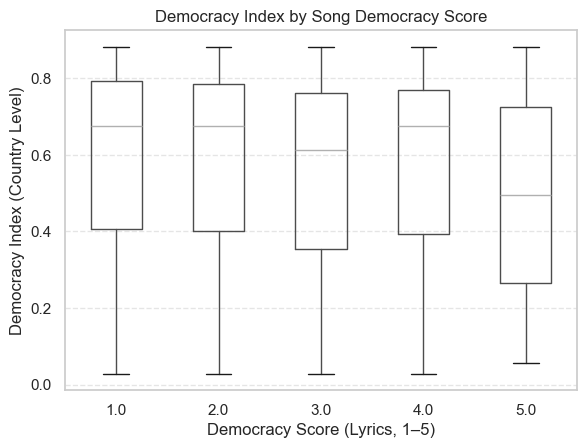

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

CSV_FILE = "songs_with_scores.csv"

df = pd.read_csv(CSV_FILE)

df["Democracy_Index"] = pd.to_numeric(df["Democracy_Index"], errors="coerce")
df["Democracy_Score"] = pd.to_numeric(df["Democracy_Score"], errors="coerce")

# Drop missing values
df = df.dropna(subset=["Democracy_Index", "Democracy_Score"])

# --- PLOT ---
plt.figure(figsize=(8, 6))

# Create boxplot grouped by democracy score
df.boxplot(column="Democracy_Index", by="Democracy_Score", grid=False)

# --- LABELS AND TITLE ---
plt.title("Democracy Index by Song Democracy Score")
plt.suptitle("")  # Remove the default 'Boxplot grouped by' title
plt.xlabel("Democracy Score (Lyrics, 1–5)")
plt.ylabel("Democracy Index (Country Level)")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

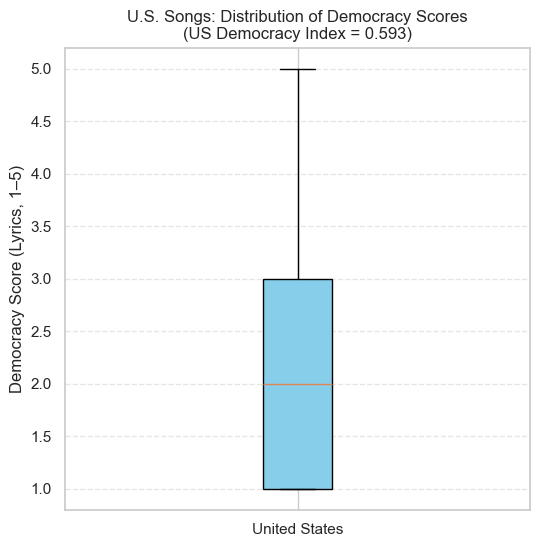

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# --- LOAD DATA ---
CSV_FILE = "songs_with_scores.csv"
df = pd.read_csv(CSV_FILE)

# --- FILTER UNITED STATES SONGS (MAKE A COPY) ---
df_us = df[df["Country"] == "United States"].copy()  # <- .copy() fixes the warning

# --- CLEAN DATA ---
df_us["Democracy_Score"] = pd.to_numeric(df_us["Democracy_Score"], errors="coerce")
df_us = df_us.dropna(subset=["Democracy_Score"])

# --- PLOT BOX PLOT ---
plt.figure(figsize=(6, 6))
plt.boxplot(df_us["Democracy_Score"], patch_artist=True, boxprops=dict(facecolor="skyblue"))

# --- LABELS ---
us_index = df_us["Democracy_Index"].iloc[0] if not df_us.empty else None
plt.title(f"U.S. Songs: Distribution of Democracy Scores\n(US Democracy Index = {us_index})")
plt.ylabel("Democracy Score (Lyrics, 1–5)")
plt.xticks([1], ["United States"])
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

✅ Plot saved to top_artists_bar_chart.png


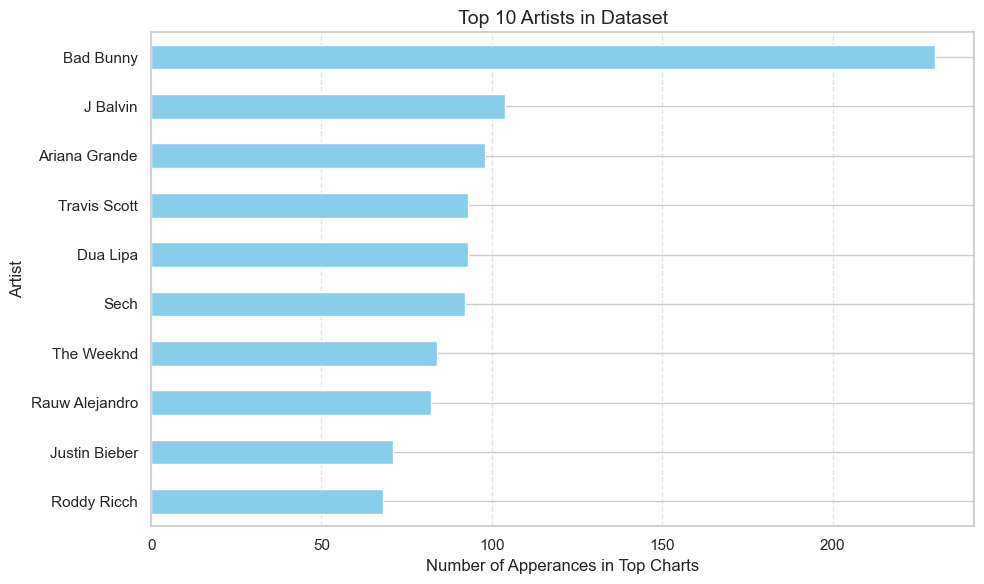

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

CSV_FILE = "songs_with_scores.csv"
TOP_N = 10                          
OUTPUT_FILE = "top_artists_bar_chart.png"

df = pd.read_csv(CSV_FILE)

df["Artists"] = df["Artists"].astype(str)
all_artists = df["Artists"].str.split(",").explode().str.strip()
artist_counts = all_artists.value_counts().head(TOP_N)

plt.figure(figsize=(10, 6))
artist_counts.sort_values().plot(kind="barh", color="skyblue")

plt.title(f"Top {TOP_N} Artists in Dataset", fontsize=14)
plt.xlabel("Number of Apperances in Top Charts")
plt.ylabel("Artist")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()

plt.savefig(OUTPUT_FILE, dpi=300)
print(f"✅ Plot saved to {OUTPUT_FILE}")

plt.show()

In [129]:
!pip install langdetect

python(73364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=b40bfeef2f237a731f7cba5b5dd2d3304468d0500ea0b838a09930b967029533
  Stored in directory: /Users/mei_knight/Library/Caches/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


✅ Pie chart saved to language_distribution_pie_chart.png


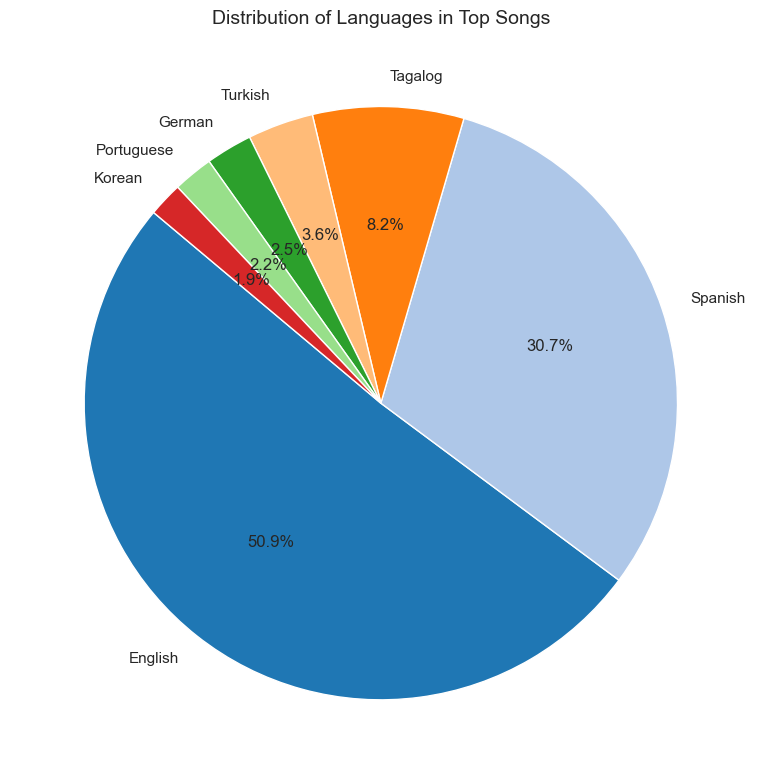

In [244]:
import pandas as pd
from langdetect import detect, DetectorFactory
import matplotlib.pyplot as plt

DetectorFactory.seed = 0

CSV_FILE = "songs_with_scores.csv"
OUTPUT_FILE = "language_distribution_pie_chart.png"
TOP_N = 7

language_map = {
    "en": "English",
    "es": "Spanish",
    "fr": "French",
    "de": "German",
    "it": "Italian",
    "pt": "Portuguese",
    "ja": "Japanese",
    "ko": "Korean",
    "ru": "Russian",
    "tr": "Turkish",
    "tl" : "Tagalog",
    "unknown": "Unknown"
}

df = pd.read_csv(CSV_FILE)

def safe_detect(text):
    try:
        return detect(str(text))
    except:
        return "unknown"

df["Language_Code"] = df["Lyrics"].apply(safe_detect)
df["Language"] = df["Language_Code"].map(language_map).fillna(df["Language_Code"])

language_counts = df["Language"].value_counts()

if len(language_counts) > TOP_N:
    top_languages = language_counts[:TOP_N]
    other_count = language_counts[TOP_N:].sum()
    language_counts = pd.concat([top_languages])

plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Distribution of Languages in Top Songs", fontsize=14)
plt.tight_layout()

plt.savefig(OUTPUT_FILE, dpi=300)
print(f"✅ Pie chart saved to {OUTPUT_FILE}")

plt.show()

In [153]:
!pip install wikipedia

python(75443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=1cb0dc5906840531060b6b565d7f42e565a4ab35b858ba6c34aa6a7383e82277
  Stored in directory: /Users/mei_knight/Library/Caches/pip/wheels/63/47/7c/a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
Successfully built wikipedia


In [171]:
!pip install wikipedia-api

python(75596) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15382 sha256=1ca5d15238c7e981146f71170abd24a3789f5b14aede0d4ed0c3cd6bdf9f7333
  Stored in directory: /Users/mei_knight/Library/Caches/pip/wheels/33/3c/79/b36253689d838af4a0539782853ac3cc38a83a6591ad570dde
Successfully built wikipedia-api


In [222]:
import pandas as pd
from time import sleep
import wikipediaapi
import re

# --- LOAD DATA ---
df = pd.read_csv("songs_with_scores.csv")

# --- COUNTRY MAPPING ---
countries = {
    "chinese": "China", "china": "China",
    "indian": "India", "india": "India",
    "english": "England",
    "british": "England",
    "irish": "Ireland",
    "american": "United States", "united states": "United States",
    "australian": "Australia",
    "puerto rican": "United States",
    "indonesian": "Indonesia", "indonesia": "Indonesia",
    "pakistani": "Pakistan", "pakistan": "Pakistan",
    "nigerian": "Nigeria", "nigeria": "Nigeria",
    "brazilian": "Brazil", "brazil": "Brazil",
    "bangladeshi": "Bangladesh", "bangladesh": "Bangladesh",
    "russian": "Russia", "russia": "Russia",
    "mexican": "Mexico", "mexico": "Mexico",
    "japanese": "Japan", "japan": "Japan",
    "ethiopian": "Ethiopia", "ethiopia": "Ethiopia",
    "filipino": "Philippines", "philippines": "Philippines",
    "egyptian": "Egypt", "egypt": "Egypt",
    "vietnamese": "Vietnam", "vietnam": "Vietnam",
    "congolese": "DR Congo", "dr congo": "DR Congo",
    "turkish": "Turkey", "turkey": "Turkey",
    "iranian": "Iran", "iran": "Iran",
    "german": "Germany", "germany": "Germany",
    "thai": "Thailand", "thailand": "Thailand",
    "british": "United Kingdom", "united kingdom": "United Kingdom",
    "french": "France", "france": "France",
    "italian": "Italy", "italy": "Italy",
    "tanzanian": "Tanzania", "tanzania": "Tanzania",
    "south african": "South Africa", "south africa": "South Africa",
    "burmese": "Myanmar", "myanmar": "Myanmar",
    "south korean": "South Korea", "south korea": "South Korea",
    "colombian": "Colombia", "colombia": "Colombia",
    "kenyan": "Kenya", "kenya": "Kenya",
    "spanish": "Spain", "spain": "Spain",
    "argentine": "Argentina", "argentinian": "Argentina", "argentina": "Argentina",
    "algerian": "Algeria", "algeria": "Algeria",
    "sudanese": "Sudan", "sudan": "Sudan",
    "ukrainian": "Ukraine", "ukraine": "Ukraine",
    "iraqi": "Iraq", "iraq": "Iraq",
    "afghan": "Afghanistan", "afghanistan": "Afghanistan",
    "polish": "Poland", "poland": "Poland",
    "canadian": "Canada", "canada": "Canada",
    "moroccan": "Morocco", "morocco": "Morocco",
    "saudi": "Saudi Arabia", "saudi arabia": "Saudi Arabia",
    "uzbek": "Uzbekistan", "uzbekistan": "Uzbekistan",
    "peruvian": "Peru", "peru": "Peru",
    "angolan": "Angola", "angola": "Angola",
    "malaysian": "Malaysia", "malaysia": "Malaysia",
    "mozambican": "Mozambique", "mozambique": "Mozambique",
    "ghanaian": "Ghana", "ghana": "Ghana",
    "yemeni": "Yemen", "yemen": "Yemen",
    "nepali": "Nepal", "nepal": "Nepal",
    "venezuelan": "Venezuela", "venezuela": "Venezuela",
    "malagasy": "Madagascar", "madagascar": "Madagascar"
}

# --- INIT WIKIPEDIA API ---
wiki_api = wikipediaapi.Wikipedia(
    language='en',
    user_agent='MusicNationalityExtractor/1.0 (https://example.com/contact)'
)
wikipedia.set_lang("en")

roles = ["rapper", "singer", "musician", "songwriter", "producer","record producer"]

def make_pattern(adj):
    return re.compile(
        rf"\b(is|was)\s+(an?|the)?\s*{re.escape(adj)}\s+(?:\w+\s+)*({'|'.join(roles)})\b",
        flags=re.IGNORECASE
    )

patterns = {adj: make_pattern(adj) for adj in countries.keys()}


# --- Function to get nationality ---
def get_artist_country(artist_name, max_search=5):
    try:
        titles = wikipedia.search(artist_name)
        if not titles:
            print(f"❌ No search results for {artist_name}")
            return "Other"

        # Prioritize "singer", "musician", "rapper", etc. pages
        preferred_titles = [
            t for t in titles if any(f"({role})" in t.lower() for role in roles)
        ]
        ordered_titles = preferred_titles + [t for t in titles if t not in preferred_titles]

        for title in ordered_titles[:max_search]:
            page = wiki_api.page(title)
            if not page.exists():
                continue

            text = (page.summary or "") + " " + (page.text.split("\n\n")[0] if page.text else "")
            text = text.lower()

            for adj, pattern in patterns.items():
                if pattern.search(text):
                    print(f"✅ Found '{adj}' in {title}")
                    return countries[adj]

        print(f"❌ No nationality found for {artist_name}")
        return "Other"

    except Exception as e:
        print(f"⚠️ Error for {artist_name}: {e}")
        return "Other"

for i, row in df.iterrows():
    artist = str(row["Artists"])
    country = get_artist_country(artist)
    print(f"{i+1}. {artist} → {country}")
    
df.to_csv("songs_with_countries.csv", index=False)
print("Saved to songs_with_countries.csv")
print("\n✅ Done!")

✅ Found 'argentine' in Trueno (rapper)
1. Nicki Nicole → Argentina
✅ Found 'colombian' in Camilo (singer)
2. Camilo → Colombia
✅ Found 'colombian' in Feid
3. Feid, Justin Quiles → Colombia
✅ Found 'puerto rican' in Bad Bunny
4. Bad Bunny → United States
✅ Found 'argentine' in Trueno (rapper)
5. Bizarrap, C.R.O → Argentina
✅ Found 'american' in Dalex
6. Rauw Alejandro, Dalex, Lenny Tavárez, Dímelo Flow → United States
✅ Found 'colombian' in J Balvin
7. J Balvin → Colombia
✅ Found 'puerto rican' in Bad Bunny
8. Bad Bunny, Jowell & Randy, Nengo Flow → United States
✅ Found 'puerto rican' in Rauw Alejandro
9. Rauw Alejandro → United States
✅ Found 'spanish' in Quevedo (singer)
10. Ovy On The Drums, Beéle → Spain
✅ Found 'colombian' in Karol G
11. KAROL G, Nicki Minaj → Colombia
✅ Found 'american' in Dalex
12. Dalex, Lenny Tavárez, Chencho Corleone, Juhn, Dímelo Flow → United States
✅ Found 'colombian' in Camilo (singer)
13. Camilo, Evaluna Montaner → Colombia
✅ Found 'puerto rican' in Myke

In [224]:
import pandas as pd
import re

df = pd.read_csv("songs_with_scores.csv")

with open("Countries.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

artist_country_map = {}

for line in lines:
    line = line.strip()
    match = re.search(r"\d+\.\s*(.+?)\s*→\s*(.+)", line)
    if match:
        artist_name = match.group(1).strip()
        country = match.group(2).strip()
        artist_country_map[artist_name] = country

df["Primary_Artist"] = df["Artists"].str.split(",").str[0].str.strip()

df["Artist Country"] = df["Primary_Artist"].map(artist_country_map).fillna("Unknown")

df.to_csv("songs_with_countries.csv", index=False)

print("✅ 'Artist Country' column added and saved to 'songs_with_countries.csv'")

✅ 'Artist Country' column added and saved to 'songs_with_countries.csv'


In [226]:
import pandas as pd

df = pd.read_csv("songs_with_countries.csv")

df["Artist Country"] = df["Artist Country"].replace("Unknown", "Other")

df.to_csv("songs_with_countries.csv", index=False)

print("✅ All 'Unknown' values replaced with 'Other'")

✅ All 'Unknown' values replaced with 'Other'


/var/folders/tr/tvj5n0_12bd8bbv5qjp5_l4m0000gn/T/ipykernel_45711/2143768580.py:16: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from font(s) Arial.
  plt.savefig(OUTPUT_FILE, dpi=300)


✅ Pie chart saved to marketshare_pie_chart.png


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


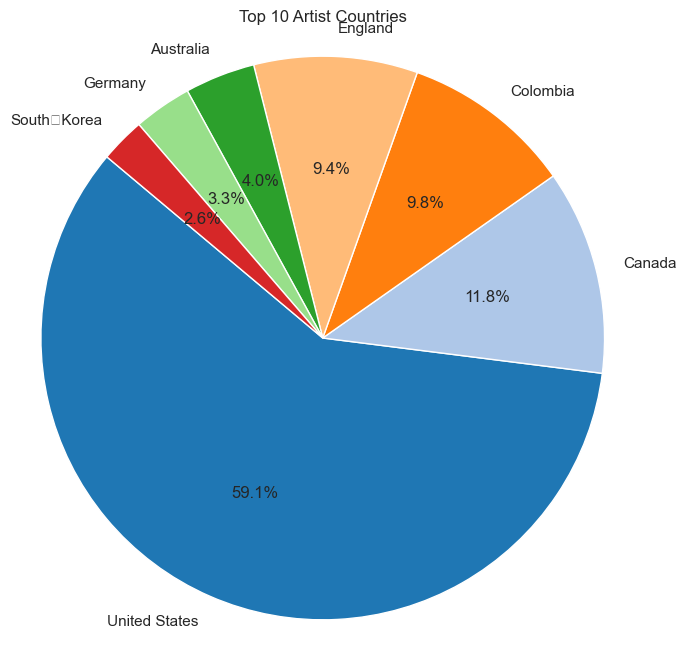

In [236]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("songs_with_countries.csv")
OUTPUT_FILE = "marketshare_pie_chart.png"

country_counts = df[df["Artist Country"] != "Other"]["Artist Country"].value_counts()

top_countries = country_counts.head(7)

plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.tab20.colors)
plt.title("Top 10 Artist Countries")
plt.axis("equal")

plt.savefig(OUTPUT_FILE, dpi=300)
print(f"✅ Pie chart saved to {OUTPUT_FILE}")

plt.show()

In [250]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# --- Load your dataset ---
df = pd.read_csv("songs_with_scores.csv")

# --- Filter for U.S. songs only ---
df_us = df[df["Country"] == "United States"].copy()

# --- Initialize Sentiment Analyzer ---
sia = SentimentIntensityAnalyzer()

# --- Compute sentiment for each lyric ---
df_us["Sentiment"] = df_us["Lyrics_EN"].apply(
    lambda x: sia.polarity_scores(x)["compound"] if isinstance(x, str) and x.strip() else 0
)

# --- Save to new CSV ---
df_us.to_csv("us_songs_with_vader_scores.csv", index=False)

print(f"✅ Done! Analyzed {len(df_us)} U.S. songs and saved to 'us_songs_with_vader_scores.csv'")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mei_knight/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Done! Analyzed 50 U.S. songs and saved to 'us_songs_with_vader_scores.csv'


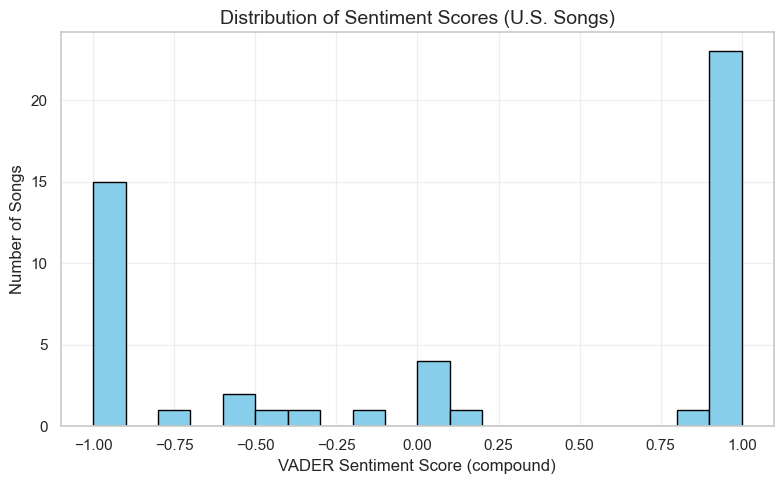

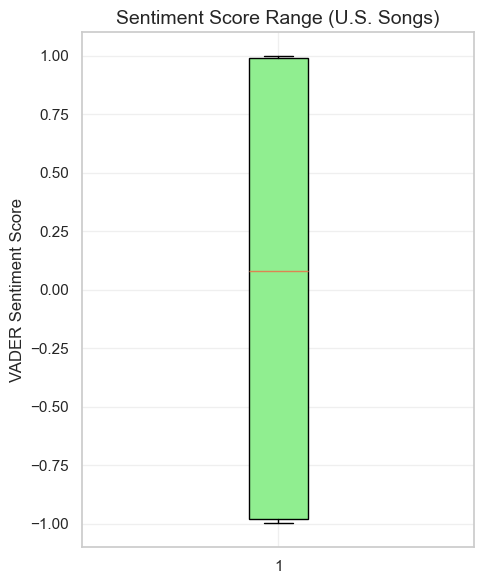

In [252]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the U.S. songs with sentiment scores
df_us = pd.read_csv("us_songs_with_vader_scores.csv")

# --- Histogram of Sentiment Scores ---
plt.figure(figsize=(8, 5))
plt.hist(df_us["Sentiment"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Sentiment Scores (U.S. Songs)", fontsize=14)
plt.xlabel("VADER Sentiment Score (compound)")
plt.ylabel("Number of Songs")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("us_sentiment_distribution_hist.png")  # Save histogram
plt.show()

# --- Box Plot of Sentiment Scores ---
plt.figure(figsize=(5, 6))
plt.boxplot(df_us["Sentiment"], vert=True, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("Sentiment Score Range (U.S. Songs)", fontsize=14)
plt.ylabel("VADER Sentiment Score")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("us_sentiment_boxplot.png")  # Save boxplot
plt.show()


In [ ]:
df_us = pd.read_csv("us_songs_with_vader_scores.csv")